# Mjerenja variraju

Recimo da mjerimo nečija bacanja udalj. Svako bacanje će dati neku drugu udaljenost. Zanima nas nekakva "srednja" udaljenost do koje se osoba može dobaciti. Nadalje, zanima nas koliko su bacanja "raspršena", odnosno koliko osoba konzistentno baca (je su li sva bacanja usko grupirana oko neke udaljenosti ili se znatno razlikuju jedno od drugog).

In [ ]:
#Generiramo mjerenja; x je lista koja sadrži sva mjerenja
import numpy as np

x=[] #za početak lista mjerenja je prazna

#parametri po kojima ćemo generirati podatke
srednja_vrijednost_stvarna=15
greska_stvarna=0.5
broj_mjerenja=20


#Dodaj slučajni broj u listu mjerenja
for i in range(broj_mjerenja):
  x.append(np.random.normal(srednja_vrijednost_stvarna, greska_stvarna))

print(x)

[15.715544796546505, 15.487050342932907, 15.09717469409925, 14.5535255796626, 15.546388029880704, 14.830208496800813, 15.768904357812602, 14.852791565216187, 15.051209232543574, 14.99836341564488, 15.004085367067812, 15.45170044072928, 15.166695412823044, 15.444288814971449, 15.695055984956571, 15.52285422591205, 14.686351087939903, 15.324239273579362, 14.586052615893916, 15.186248449772897]


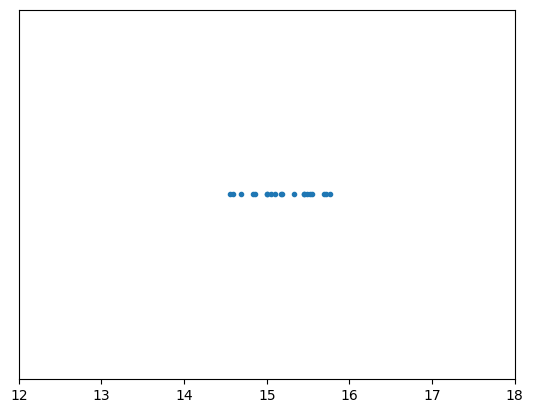

In [ ]:
#Vizualiziramo mjerenja

import matplotlib.pyplot as plt

#sva mjerenja crtamo na x osi, dakle y koordinate su sve 0; y je lista nula iste dužine kao x
y=np.zeros_like(x)

#ucrtaj mjerenja
plt.scatter(x, y, marker='.')

lim=3 #crtamo interval od srednja vrijednost-lim do srednja vrijednost + lim
plt.xlim(srednja_vrijednost_stvarna-lim,srednja_vrijednost_stvarna+lim)
plt.yticks([])


#prikaži graf
plt.show()


# Mjera centriranosti podataka
**Srednja vrijednost** (za 5 mjerenja): $$\overline{x}=\frac{x_1+x_2+x_3+x_4+x_5}{5}$$

Ovo je isti postupak kada računate prosjek ocjena - zbroji sve ocjene i podijeli s brojem ocjena.


In [ ]:
#Srednja vrijednost
srednja_vrijednost=sum(x)/broj_mjerenja

print(srednja_vrijednost)

15.198436609239314


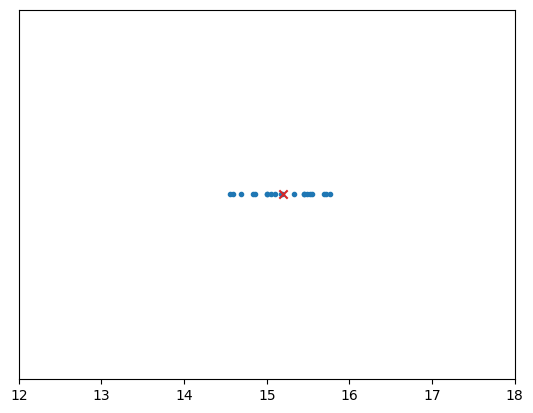

In [ ]:
#Vizualiziramo srednju vrijednost

import matplotlib.pyplot as plt

#sva mjerenja crtamo na x osi, dakle y koordinate su sve 0; y je lista nula iste dužine kao x
y=np.zeros_like(x)

#ucrtaj mjerenja
plt.scatter(x, y, marker='.', color='tab:blue')

#ucrtaj srednju vrijednost
plt.scatter(srednja_vrijednost,0, marker='x', color='tab:red')

lim=3 #crtamo interval od srednja vrijednost-lim do srednja vrijednost + lim
plt.xlim(srednja_vrijednost_stvarna-lim,srednja_vrijednost_stvarna+lim)
plt.yticks([])

# prikaži graf
plt.show()


# Mjere raspršenosti podataka


Apsolutna greška prvog mjerenja $$A_1=\lvert x_1 - \overline{x} \rvert $$

kaže koliko je prvo mjerenje udaljeno od srednje vrijednosti.


**Maximalna apsolutna greška** $\sigma_{max}$ je, kao što sami naziv kaže, apsolutna greška onog mjerenja koje najviše odstupa od srednje vrijednosti.
Za dani skup podataka, to možemo shvatiti kao "worst case scenario" (najgori mogući slučaj, najveće odstupanje). To je dakle interval centriran na srednjoj vrijednosti unutar kojeg se nalaze sva ostala mjerenja.


**Srednja apsolutna greška** za 5 mjerenja (L1 greška): $$σ_{1}=\frac{A_1+A_2+A_3+A_4+A_5}{5}$$
kaže koliko su mjerenja u prosjeku udaljena od srednje vrijednosti.




---



Kvadrat greške prvog mjerenja: $$K_1=\lvert x_1 - \overline{x} \rvert^2=(x_1 - \overline{x})^2$$

u odnosu na apsolutnu grešku stavlja nešto veći naglasak na "outliere", tj. mjerenja koja se znatno razlikuju od srednje vrijednosti.

**Srednja kvadratna greška** za 5 mjerenja (L2 greška): $$\sigma_2=\sqrt{\frac{K_1+K_2+K_3+K_4+K_5}{5}}$$

Bitno za primijetiti: ako su nam mjerenja (x-evi) udaljenosti iskazane u m, onda je svaki $K_1, K_2...$ iskazan u $\text{m}^2$. Uzimamo korijen da bismo ponovno dobili grešku u m.

Srednja kvadratna greška je standardna mjera "raspršenost" podataka, stoga je još zovemo **standardna devijacija** i pišemo samo $\sigma$.



---



Općenito bismo mogli promatrati p-tu potenciju greške prvog mjerenja $$E_1=\lvert x_1 - \overline{x} \rvert^p $$
za bilo koji broj pozitivni broj p

potom bismo računali srednju Lp grešku kao p-ti korijen: $$\sigma_p=\sqrt[p]{\frac{E_1+E_2+E_3+E_4+E_5}{5}}$$

In [ ]:
#Greška
apsolutne_greske=[abs(mjerenje-srednja_vrijednost)for mjerenje in x]
kvadrati_greske=[(mjerenje-srednja_vrijednost)**2 for mjerenje in x]

maksimalna_apsolutna_greska=max(apsolutne_greske)
srednja_apsolutna_greska=sum(apsolutne_greske)/broj_mjerenja
srednja_kvadratna_greska=np.sqrt(sum(kvadrati_greske)/broj_mjerenja) #aka standardna devijacija

print(maksimalna_apsolutna_greska, srednja_apsolutna_greska, srednja_kvadratna_greska)

1.30734376363527 0.42021352245404653 0.5200465268018057


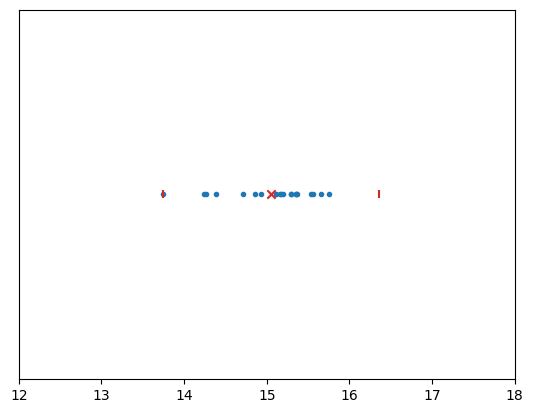

In [ ]:
#Vizualiziramo maksimalnu apsolutnu grešku

import matplotlib.pyplot as plt

#sva mjerenja crtamo na x osi, dakle y koordinate su sve 0; y je lista nula iste dužine kao x
y=np.zeros_like(x)

#ucrtaj podatke
plt.scatter(x, y, marker='.', color='tab:blue')

#ucrtaj srednju vrijednost
plt.scatter(srednja_vrijednost,0, marker='x', color='tab:red')

#ucrtaj interval maskimalne apsolutne greške
plt.scatter([srednja_vrijednost-maksimalna_apsolutna_greska, srednja_vrijednost+maksimalna_apsolutna_greska], [0,0], marker='|', color='tab:red')


lim=3 #interval koji crtamo je od srednja vrijednost-lim do srednja vrijednost+lim
plt.xlim(srednja_vrijednost_stvarna-lim,srednja_vrijednost_stvarna+lim)
plt.yticks([])

#prikaži graf
plt.show()


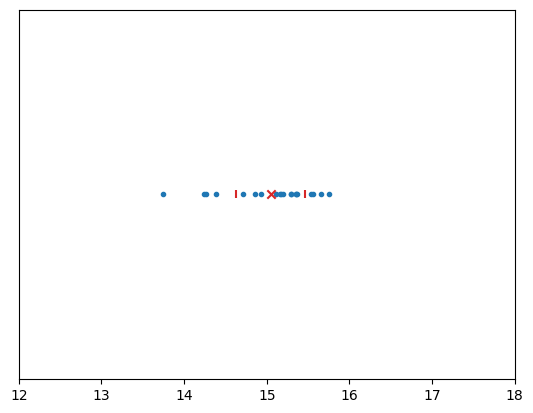

In [ ]:
#Vizualiziramo srednju apsolutnu grešku

import matplotlib.pyplot as plt

#sva mjerenja crtamo na x osi, dakle y koordinate su sve 0; y je lista nula iste dužine kao x
y=np.zeros_like(x)

#ucrtaj podatke
plt.scatter(x, y, marker='.', color='tab:blue')

#ucrtaj srednju vrijednost
plt.scatter(srednja_vrijednost,0, marker='x', color='tab:red')

#ucrtaj interval srednje apsolutne greške
plt.scatter([srednja_vrijednost-srednja_apsolutna_greska, srednja_vrijednost+srednja_apsolutna_greska], [0,0], marker='|', color='tab:red')


lim=3 #interval koji crtamo je od srednja vrijednost-lim do srednja vrijednost+lim
plt.xlim(srednja_vrijednost_stvarna-lim,srednja_vrijednost_stvarna+lim)
plt.yticks([])

#prikaži graf
plt.show()


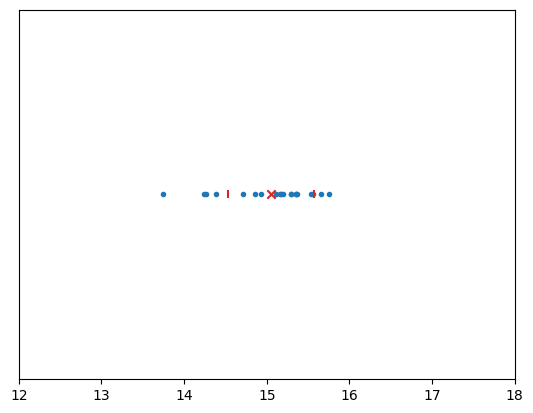

In [ ]:
#Vizualiziramo srednja kvadratnu grešku (standardnu devijaciju)

import matplotlib.pyplot as plt

#sva mjerenja crtamo na x osi, dakle y koordinate su sve 0; y je lista nula iste dužine kao x
y=np.zeros_like(x)

#ucrtaj podatke
plt.scatter(x, y, marker='.', color='tab:blue')

#ucrtaj srednju vrijednost
plt.scatter(srednja_vrijednost,0, marker='x', color='tab:red')

#ucrtaj interval srednje kvadratne greške
plt.scatter([srednja_vrijednost-srednja_kvadratna_greska, srednja_vrijednost+srednja_kvadratna_greska], [0,0], marker='|', color='tab:red')


lim=3 #interval koji crtamo je od srednja vrijednost-lim do srednja vrijednost+lim
plt.xlim(srednja_vrijednost_stvarna-lim,srednja_vrijednost_stvarna+lim)
plt.yticks([])

#prikaži graf
plt.show()


Jednom kada odaberemo mjeru raspršenosti koju ćemo koristiti (gotovo uvijek je to standardna devijacija), rezultat zapisujemo u obliku $x=\overline{x}\pm \sigma$

Dakle:

In [ ]:
from IPython.display import display, Markdown, Latex

#zaokružimo na dvije decimale
srednja_vrijednost=round(srednja_vrijednost,2)
srednja_kvadratna_greska=round(srednja_kvadratna_greska,2)

text = '$x=' + str(srednja_vrijednost) + '\pm' + str(srednja_kvadratna_greska) + '$'
display(Markdown(text))

$x=15.05\pm0.52$

Ako je $\sigma$ standardna devijacija, a imamo $N$ mjerenja, izračunamo tzv. standardnu grešku (standard error) $SE=\frac{\sigma}{\sqrt{N}}$.
Sada interval $\overline{x}\pm SE$ ima relativno lijepu interpretaciju.

Recimo da smo napravili puno mjerenja i izračunali srednju vrijednost.
Možemo ponoviti mjerenja i ponovno (za novi set mjerenja) izračunati srednju vrijednost. Zamislimo da ovaj postupak ponovimo puno puta.
U tom slučaju oko 68% puta će srednja vrijednost biti u gornjem intervalu.

 S druge strane, ako uzmemo  $\overline{x}\pm 2SE$ (duplo veći interval), onda će oko 95% puta biti unutar tog intervala, za $3SE$ već dobijemo preko 99%.
Vidi https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

Veći interval naravno znači veća sigurnost (izglednije je da za prosječni skup mjerenja srednja vrijednost upada unutar tog intervala).



Inače (čisto da spomenemo), ovo vrijedi zbog tzv. centralnog graničnog teorema, koji kaže da će (za vrlo velik broj mjerenja) srednja vrijednost pratiti tzv. Gausssovu (ili normalnu) distribuciju sa standardnom devijacijom $\frac{\sigma}{\sqrt{N}}$. Vidi https://en.wikipedia.org/wiki/Central_limit_theorem. Gornje vjerojatnosti onda proizlaze iz normalne distribucije https://en.wikipedia.org/wiki/Normal_distribution.

# Značajne znamenke

U stvarnosti nemamo savršene mjerne instrumente, tj. nećemo dobiti rezultat mjerenja $x_1=15.097334039587636$m, već sami mjerni instrument (metar koji koristimo) ima neku svoju nepreciznost. Primjerice, možda metar koji koristimo ne može razlučiti milimetre, tj. na sebi ima samo označene centimetre (i ništa između). U tom slučaju možemo jedino znati da je udaljenost $15.09$m i "još malo". Drugim riječima, sa metra možemo iščitati 15m i 9cm, no ne možemo iščitati milimetre - znamo da je duljina između 15m i 9 cm te 15m i 10cm, ali ne znamo točno kolika.


Dakle, sama mjerenja ćemo dobiti u obliku $15.09\pm 0.01$ (duljina je 15m i 9cm i eventualno jedan centimatar gore-dolje).

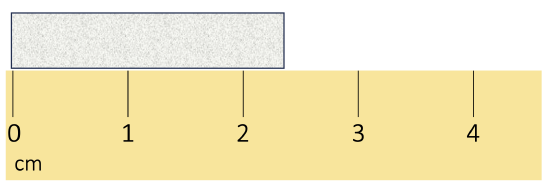

Slika izvor: https://chem.libretexts.org/Courses/Saint_Francis_University/CHEM_113%3A_Human_Chemistry_I_(Muino)/01%3A_Matter_and_Measurements/1.08%3A_Measurement_and_Significant_Figures


# Zbrajanje značajnih znamenki

Recimo da imamo dvije osobe - Ana i Bob - svatko sa svojim štapom. Ana ima metar koji može samo mjeriti centimetre i dobije da je njen štap dug 15.09m. Bob pak sa svojim metrom može razlučiti i milimetre te on dobije 11.216m. Koliko će biti dugi štapovi ako ih stavimo jedan do drugog?

Odgovor je očito zbroj njihovih duljina, ali kako će se značajne znamenke ponašati pri zbrajanju?

Kako znamo duljinu prvog štapa samo do na najbliži centimetar, i ukupnu duljinu ćemo znati samo do na najbliži centimetar. Dakle, zaokružit ćemo Bobov rezultat do na preciznost koja je dostupna Ani i zbrojiti:

$$15.09\text{m}+11.22\text{m}=26.31\text{m}$$

# Množenje značajnih znamenki

Recimo da sada želimo izračunati površinu pravokutnika kojega razapinju Anin i Bobov štap. Koliko će površina imati značajnih znamenki?

Ako pomnožimo izmjerene duljine, dobijemo $15.09\cdot 11.216=169.24944$. Kako poznajemo samo 4 znamenke broja 15.09, isto tako u stvarnosti poznajemo samo prve 4 znamenke broja 169.24944, tj. zaokružujemo na $169.2$.

Zaista:

$$
15.09\cdot 11.216=15.09\cdot 10+15.09\cdot 1+15.09\cdot 0.2+ 15.09\cdot 0.01+15.09\cdot 0.006
$$

Ali prvi član $15.09\cdot 10=150.9$ je već nesiguran na prvoj decimali (desetine). Dakle, i rezultat mora biti nesiguran u prvoj decimali.


# Dodatak: Matematički izvod zbrajanja i množenja greške

Neka je stvarna vrijednost duljine Aninog štapa $15.09+\varepsilon_A$, gdje je $\varepsilon_A$ mala greškica (error), tj. razlika između stvarne vrijednosti i one koju Anin instrument može razlučiti.

Isto tako neka je stvarna vrijednost duljine Bobovog štapa $11.216+\varepsilon_B$.

Onda je stvarna duljina $(15.09+\varepsilon_A)+(11.216+\varepsilon_B)=(15.09+11.216)+(\varepsilon_A+\varepsilon_B)$

Dakle, greške se zbrajaju. Kada jedna greška dominira (u ovom slučaju Anina greška je cm, a Bobova je mm), onda koristimo onoliko značajnih znamenki koliko veća greška diktira (dvije decimale u ovom slučaju).



---



Ukratko o distributivnosti:

Primijetimo da vrijedi $17\cdot 5=(10+7)\cdot 5=10\cdot 5+7\cdot 5$. Riječima: sedamnaest petica je isto što i deset petica i još sedam petica.
Općenito, za bilo koje brojeve $a$, $b$, $c$ imamo $a(b+c)=ab+ac$.
Sada možemo ovo svojstvo primijeniti 2 puta da dobijemo $$(a+b)(c+d)=(a+b)c+(a+b)d=ac+bc+ad+bd$$
Dvije zagrade množimo tako da pomnožimo "svaki sa svakim" (svaki iz prve zagrade sa svakim iz druge).


Ako je $15.09+\varepsilon_A$ stvarna duljina Aninog štapa, onda relativna greška kaže koliki udio ukupne duljine pokriva greška $\varepsilon_A$. Matematički, $r_A=\frac{\varepsilon_A}{15.09}$, tj. $\varepsilon_A=15.09\cdot r_A$


Stvarna duljina Aninog štapa je onda $15.09+\varepsilon_A=15.09\cdot 1+15.09\cdot r_A=15.09(1+r_A)$

Na isti način zapišimo i stvarnu duljinu Bobovog štapa $11.216(1+r_B)$.

Onda je stvarna površina:

$$
15.09(1+r_A) \cdot 11.216(1+r_B)=(15.09\cdot 11.216)\cdot (1+r_A) (1+r_B)=168.46432\cdot (1+r_B+r_A+r_Ar_B)
$$

Kako su relativne greške puno manje od 1, umnožak dva sitna broja je obično zanemariv (npr. $0.001\cdot 0.001=0.000001$, tj. $\frac{1}{1000}\cdot \frac{1}{1000}=\frac{1}{1000000}$)

Dakle, imamo da je stvarna duljina približno $168.46432\cdot (1+r_B+r_A)$, tj. relativne greške se (približno) zbrajaju. Ako jedno mjerenje ima puno veću relativnu grešku od drugog - ta relativna greška će dominirati.
